### Data Pre Processing Analysis
##### Standard Scaler / Normaliztion

We are going to investigate the affect of normalizing data by visualizing data before and after via scatterplots.

In [1]:
#import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import normalize, StandardScaler 

In [2]:
#Replace Column Dataframes
data = pd.read_csv('Mall_Customers.csv') 
#Replace Column Dataframes
data = data.rename(columns = {'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'})
# Dropping irrelevant columns 
drop_features = ['Gender'] 
data = data.drop(drop_features, axis = 1) 
#print head of dataset
data.head() 
print("An investiagtion concluded there are no missing values or values of a cause for concern in this dataset")

An investiagtion concluded there are no missing values or values of a cause for concern in this dataset


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     200 non-null    int64
 1   Age            200 non-null    int64
 2   AnnualIncome   200 non-null    int64
 3   SpendingScore  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


### Visualizing the Data before Pre-Processing 

In [4]:
#Defining Function
"""Function for scatterplot time efficiency"""
def scatterplots(X,Y):
    fig, ax = plt.subplots()
    ax.scatter(data[X], data[Y])
    plt.show()

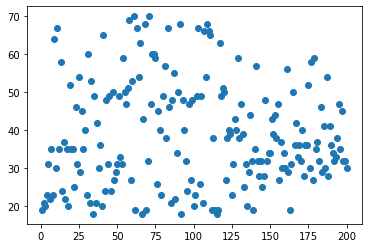

In [6]:
scatterplots('CustomerID','Age')

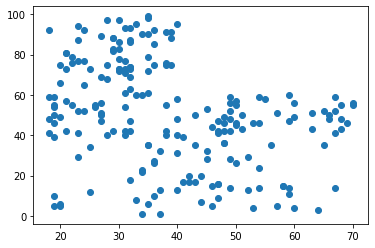

In [7]:
scatterplots('Age','SpendingScore')

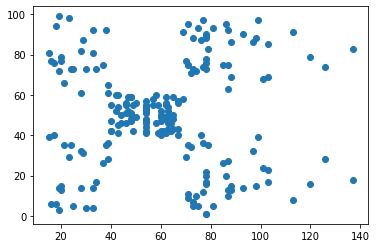

In [8]:
scatterplots('AnnualIncome','SpendingScore')

##### Data Pre-Processing

In [9]:
#Initiate Standard Scaler Function
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data) 
  
# Normalizing the data so that the data approximately follows a Gaussian distribution 
data_normalized = normalize(data_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
data_normalized = pd.DataFrame(data_normalized) 
  
# Renaming the columns 
data_normalized.columns = data.columns 
  
data_normalized.head(15) 

,CustomerID,Age,AnnualIncome,SpendingScore
0,-0.601376,-0.497096,-0.606815,-0.151722
1,-0.568519,-0.426878,-0.579485,0.398444
2,-0.520690,-0.417103,-0.524408,-0.529059
3,-0.588636,-0.400595,-0.598982,0.366405
4,-0.676720,-0.230479,-0.680210,-0.161999
5,-0.582015,-0.429991,-0.591207,0.356147
6,-0.562729,-0.096008,-0.564467,-0.596234
7,-0.522816,-0.371187,-0.530101,0.554866
8,-0.464456,0.528955,-0.464888,-0.536998
9,-0.635027,-0.257302,-0.642642,0.342852


##### Evaluation & Comparisons of Normalized and Unnormalized Data

https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

https://matplotlib.org/devdocs/plot_types/index.html

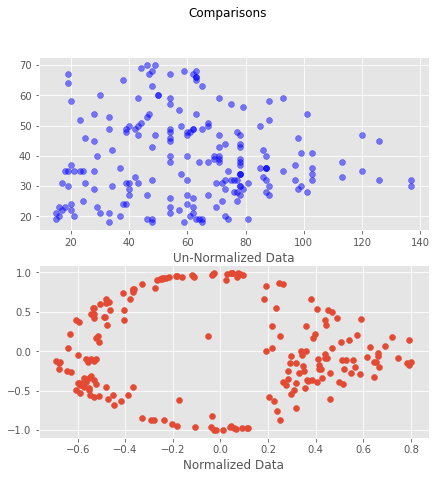

In [11]:
fig, ax = plt.subplots(2, figsize = (7,7))
fig.suptitle('Comparisons')
plt.style.use('ggplot')
ax[0].scatter(data['AnnualIncome'], data['Age'],color = 'b', alpha = 0.5)
ax[1].scatter(data_normalized['AnnualIncome'],data_normalized['Age'])
ax[0].set_xlabel('Un-Normalized Data')
ax[1].set_xlabel('Normalized Data')
plt.show()

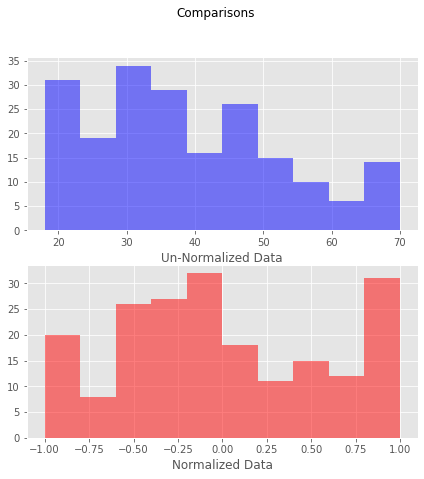

In [12]:
fig, ax = plt.subplots(2, figsize = (7,7))
fig.suptitle('Comparisons')
plt.style.use('ggplot')
ax[0].hist(data['Age'],color = 'b', alpha = 0.5)
ax[1].hist(data_normalized['Age'], color = 'r', alpha = 0.5)
ax[0].set_xlabel('Un-Normalized Data')
ax[1].set_xlabel('Normalized Data')
plt.show()

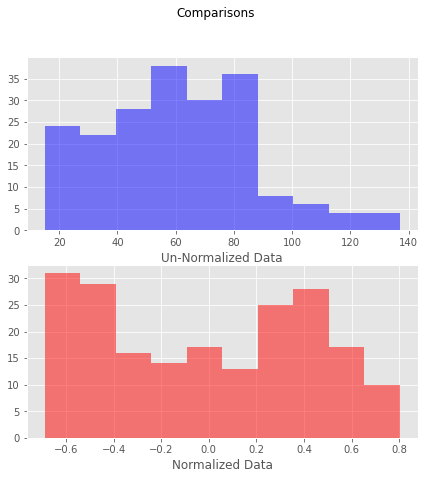

In [13]:
fig, ax = plt.subplots(2, figsize = (7,7))
fig.suptitle('Comparisons')
plt.style.use('ggplot')
ax[0].hist(data['AnnualIncome'],color = 'b', alpha = 0.5)
ax[1].hist(data_normalized['AnnualIncome'], color = 'r', alpha = 0.5)
ax[0].set_xlabel('Un-Normalized Data')
ax[1].set_xlabel('Normalized Data')
plt.show()

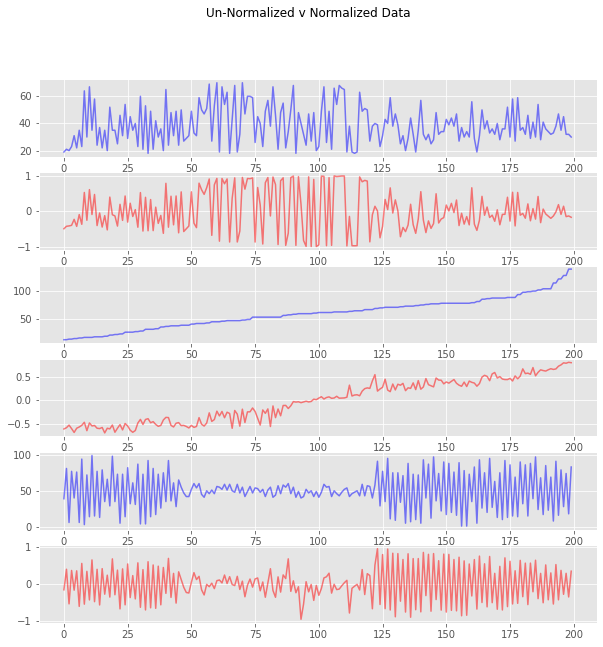

In [17]:
fig, ax = plt.subplots(6, figsize = (10,10))
fig.suptitle('Un-Normalized v Normalized Data')
plt.style.use('ggplot')
ax[0].plot(data['Age'],color = 'b', alpha = 0.5)
ax[1].plot(data_normalized['Age'], color = 'r', alpha = 0.5)
ax[2].plot(data['AnnualIncome'], color = 'b', alpha = 0.5)
ax[3].plot(data_normalized['AnnualIncome'], color = 'r', alpha = 0.5)
ax[4].plot(data['SpendingScore'], color = 'b', alpha = 0.5)
ax[5].plot(data_normalized['SpendingScore'], color = 'r', alpha = 0.5)
plt.show()

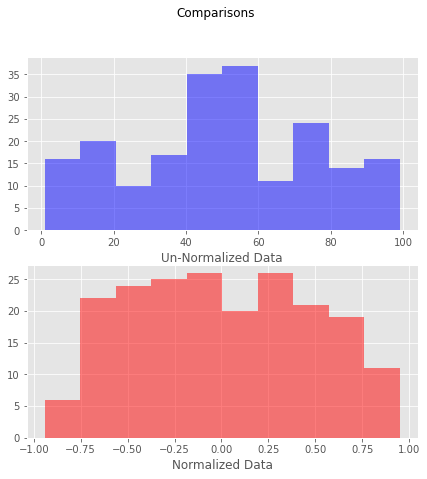

In [18]:
fig, ax = plt.subplots(2, figsize = (7,7))
fig.suptitle('Comparisons')
plt.style.use('ggplot')
ax[0].hist(data['SpendingScore'],color = 'b', alpha = 0.5)
ax[1].hist(data_normalized['SpendingScore'], color = 'r', alpha = 0.5)
ax[0].set_xlabel('Un-Normalized Data')
ax[1].set_xlabel('Normalized Data')
plt.show()

##### QQ Plot

The data points should follow accurately along the 45 degree line if the data follows a normaly distributed curve (gaussian curve)

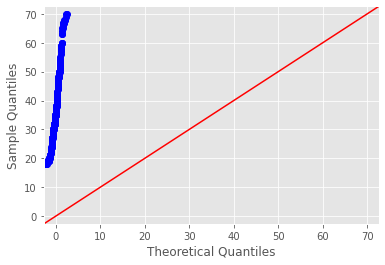

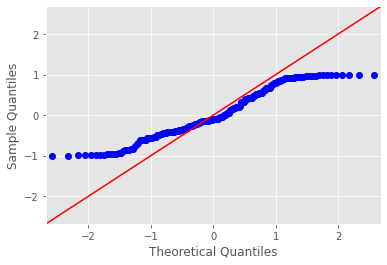

In [20]:
#Compute QQ Plot
fig = fig.suptitle('Q-Q Plot')
fig = sm.qqplot(data['Age'], line ='45')
fig = sm.qqplot(data_normalized['Age'], line ='45')
plt.show()

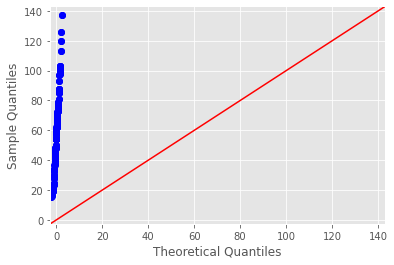

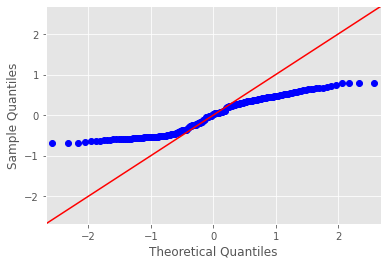

In [21]:
#Compute QQ Plot
fig = fig.suptitle('Q-Q Plot')
fig = sm.qqplot(data['AnnualIncome'], line ='45')
fig = sm.qqplot(data_normalized['AnnualIncome'], line ='45')
plt.show()

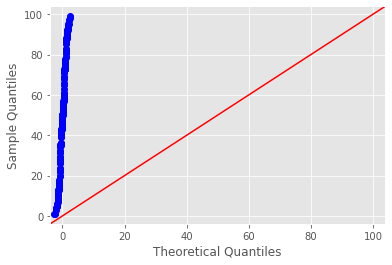

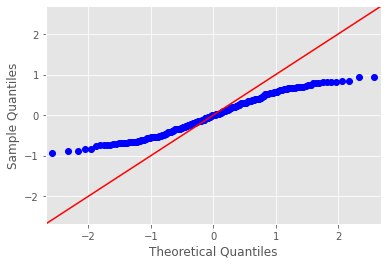

In [22]:
#Compute QQ Plot
fig = fig.suptitle('Q-Q Plot')
fig = sm.qqplot(data['SpendingScore'], line ='45')
fig = sm.qqplot(data_normalized['SpendingScore'], line ='45')
plt.show()